In [1]:
%matplotlib inline
import matplotlib.pylab as plt

In [6]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.grid'] = True 
plt.rcParams['lines.linewidth'] = 2
for d in range(1, 10):
  v = np.log10((d+1)/d)
  print('{:.4f}'.format(v))
benford_values =  {d:np.log10((d+1)/d) for d in range(1,10)}
benford_values
df = pd.DataFrame({'benford': benford_values})


0.3010
0.1761
0.1249
0.0969
0.0792
0.0669
0.0580
0.0512
0.0458


In [7]:
df

,benford
1,0.301030
2,0.176091
3,0.124939
4,0.096910
5,0.079181
6,0.066947
7,0.057992
8,0.051153
9,0.045757


In [8]:
import re
import numpy as np

def benford(df_list, plot=True):
  val_list = []
  # 전달된 데이터프레임 리스트에서 숫자 문자열만 추출
  for df in df_list:
    df = df.astype(str)
    # 특정 문자열을 포함하는 데이터프레임만 대상
    if any(x in df.to_html() for x in ['유동자산', '매출원가', '포괄손익', '현금흐름', '당기순이익']):
      values = df.replace('[^0-9]', '', regex=True).values.reshape(-1)
      val_list.extend(values)

  # 첫 글자 목록 추출
  leading_digits = [int(v[0]) for v in val_list if v]

  # 개수 세기
  counter = {i:0 for i in range(1, 10)}
  for i in leading_digits:
    counter[i] =  counter.get(i, 0) + 1

  # 비율 구하기
  total = sum(counter.values())
  finstat_ratio = {i: counter[i]/total for i in counter.keys()}

  # 데이터 프레임을 생성하여 반환
  benford_values =  {d:np.log10((d+1)/d) for d in range(1,10)}
  df_ratio = pd.DataFrame({
    'benford': benford_values,
    'finstat': finstat_ratio
  })
  if plot:
    df_ratio.plot()
  return df_ratio

# return RMSE와 최대오차(max)
def benford_desc(df_list):
  df = benford(df_list, plot=False)
  rmse = ((df['finstat'] - df['benford']) ** 2).mean() ** 0.5
  max_err = np.abs(df['finstat'] - df['benford']).max()
  return rmse, max_err

In [12]:
url = 'http://dart.fss.or.kr/report/viewer.do?rcpNo=20210401000355&dcmNo=7945637&eleId=3&offset=11657&length=549224&dtd=dart3.xsd'
dfs = pd.read_html(url)
len(dfs)

299

,benford,finstat
1,0.301030,0.330498
2,0.176091,0.178615
3,0.124939,0.137303
4,0.096910,0.089915
5,0.079181,0.070474
6,0.066947,0.074119
7,0.057992,0.026731
8,0.051153,0.061968
9,0.045757,0.027947
0,NaN,0.002430


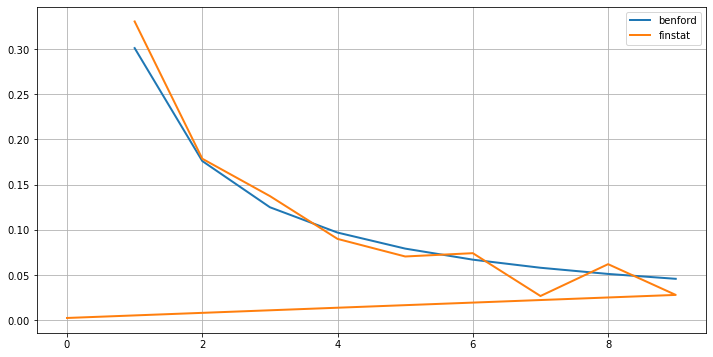

In [15]:
df = benford(dfs)
df

In [14]:
benford_desc(dfs)

(0.017046432851673697, 0.031260476746824035)